## Question

How doesnstanding impact attendance at a major league football team. 

In [ ]:
import pandas as pd
from siuba import *
from plotnine import *

In [4]:
## Loading the attendance data
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-04/attendance.csv'
attendance = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
attendance.describe()

,year,total,home,away,week,weekly_attendance
count,10846.000000,1.084600e+04,10846.000000,10846.000000,10846.000000,10208.000000
mean,2009.528213,1.080910e+06,540455.012539,540455.012539,9.000000,67556.876567
std,5.753415,7.287697e+04,66774.652550,25509.325673,4.899205,9022.015325
min,2000.000000,7.606440e+05,202687.000000,450295.000000,1.000000,23127.000000
25%,2005.000000,1.040509e+06,504360.000000,524974.000000,5.000000,63245.500000
50%,2010.000000,1.081090e+06,543185.000000,541757.000000,9.000000,68334.000000
75%,2015.000000,1.123230e+06,578342.000000,557741.000000,13.000000,72544.750000
max,2019.000000,1.322087e+06,741775.000000,601655.000000,17.000000,105121.000000


In [5]:
## Loading the standings data
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-04/standings.csv'
standings = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
standings.describe()

,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,6.380000e+02,638.000000,638.000000
mean,2009.528213,7.984326,7.984326,350.283699,350.283699,0.000000,-0.001881,0.001097,-6.682220e-17,-0.000157,-0.001097
std,5.757664,3.083822,3.083313,71.399067,59.546661,101.088938,6.323133,1.634369,6.200334e+00,4.340017,3.566280
min,2000.000000,0.000000,0.000000,161.000000,165.000000,-261.000000,-16.300000,-4.600000,-1.740000e+01,-11.700000,-9.800000
25%,2005.000000,6.000000,6.000000,299.000000,310.000000,-75.000000,-4.700000,-1.100000,-4.475000e+00,-3.175000,-2.400000
50%,2010.000000,8.000000,8.000000,348.000000,347.000000,1.500000,0.100000,0.000000,0.000000e+00,0.000000,0.100000
75%,2014.750000,10.000000,10.000000,396.000000,391.500000,72.750000,4.575000,1.200000,4.500000e+00,2.700000,2.500000
max,2019.000000,16.000000,16.000000,606.000000,517.000000,315.000000,19.700000,4.300000,2.010000e+01,15.900000,9.800000


In [6]:
## Loading the games data
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-04/games.csv'
games = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
games.describe()

,year,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss
count,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000
mean,2009.527047,27.781555,16.088843,361.635612,1.080203,309.080579,2.167543
std,5.754236,8.830090,8.137451,78.581154,1.037956,84.497085,1.421141
min,2000.000000,3.000000,0.000000,47.000000,0.000000,26.000000,0.000000
25%,2005.000000,21.000000,10.000000,308.000000,0.000000,251.000000,1.000000
50%,2010.000000,27.000000,16.000000,361.000000,1.000000,306.000000,2.000000
75%,2015.000000,34.000000,21.000000,415.000000,2.000000,366.000000,3.000000
max,2019.000000,62.000000,51.000000,653.000000,7.000000,613.000000,8.000000


In [22]:
## Create tables to show the attendance by week


weekly_attendance = (attendance 
                    >> group_by(_.year,_.week)
                    >> summarize(attendance = _.weekly_attendance.mean())
                    >> mutate(year = _.year.astype(str))
                    )

weekly_attendance_overall = (attendance 
                    >> group_by(_.week)
                    >> summarize(attendance = _.weekly_attendance.mean())
                            )


weekly_attendance.head(10)

,year,week,attendance
0,2000,1,66529.933333
1,2000,2,67141.533333
2,2000,3,68332.000000
3,2000,4,63450.642857
4,2000,5,70714.785714
5,2000,6,64802.714286
6,2000,7,65462.857143
7,2000,8,65518.285714
8,2000,9,65369.285714
9,2000,10,65361.333333


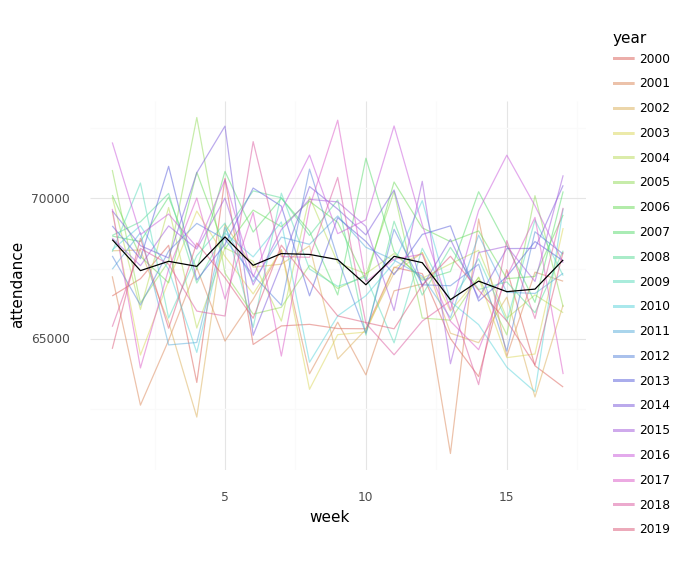

<ggplot: (319746125)>

In [25]:


(
weekly_attendance 
    >> ggplot()
    + geom_line(aes("week","attendance",color="year"),alpha=.5)
    + geom_line(weekly_attendance_overall,aes("week","attendance",group=1))
    + theme_minimal()
)

In [27]:
standings.head()

,team,team_name,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
0,Miami,Dolphins,2000,11,5,323,226,97,6.1,1.0,7.1,0.0,7.1,Playoffs,No Superbowl
1,Indianapolis,Colts,2000,10,6,429,326,103,6.4,1.5,7.9,7.1,0.8,Playoffs,No Superbowl
2,New York,Jets,2000,9,7,321,321,0,0.0,3.5,3.5,1.4,2.2,No Playoffs,No Superbowl
3,Buffalo,Bills,2000,8,8,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,No Playoffs,No Superbowl
4,New England,Patriots,2000,5,11,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,No Playoffs,No Superbowl


In [44]:




team_attendance = (attendance 
    >> filter(_.year >= 2015)
    >> group_by(_.team_name)
    >> summarize(avg_attendance = _.weekly_attendance.mean())
                  )



In [45]:
average_standing = (standings 
            >> filter(_.year >= 2015)
            >> group_by(_.team_name)
            >> summarize(mean_wins = _.wins.mean())
           )
average_standing

,team_name,mean_wins
0,49ers,6.0
1,Bears,6.8
2,Bengals,6.6
3,Bills,8.0
4,Broncos,7.8
5,Browns,3.4
6,Buccaneers,6.4
7,Cardinals,7.2
8,Chargers,7.0
9,Chiefs,11.4


In [47]:
team_att = team_attendance.merge(average_standing,on="team_name")

,team_name,avg_attendance,mean_wins
0,49ers,67979.2750,6.0
1,Bears,64982.6375,6.8
2,Bengals,61425.8750,6.6
3,Bills,68458.4625,8.0
4,Broncos,69736.5750,7.8
5,Browns,64945.7375,3.4
6,Buccaneers,63523.1000,6.4
7,Cardinals,64916.2625,7.2
8,Chargers,55026.1750,7.0
9,Chiefs,70041.6750,11.4


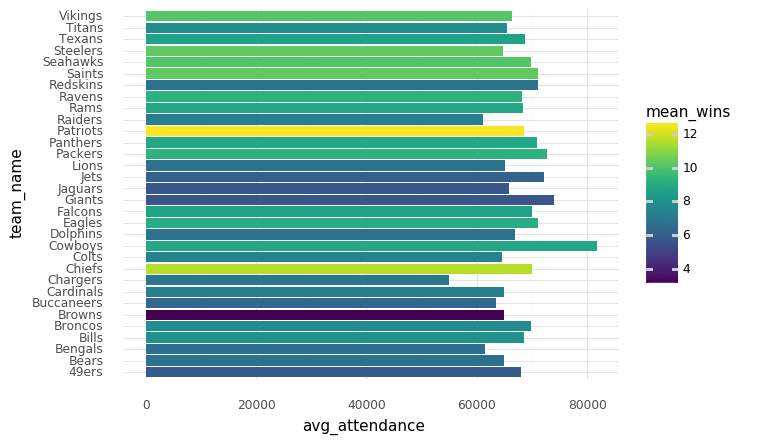

<ggplot: (313139797)>

In [50]:
(
team_att
    >> ggplot(aes(x="team_name",y="avg_attendance",fill="mean_wins"))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_minimal()

)